In [3]:
!pip install stable-baselines3[extra]

In [ ]:
pip install shimmy>=2.0

In [8]:
!pip install gymnasium

In [5]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [6]:
import torch
print(f"CUDA Available: {torch.cuda.is_available()}")
print(f"CUDA Version: {torch.version.cuda}")
print(f"GPU Name: {torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'No GPU found'}")


CUDA Available: True
CUDA Version: 12.1
GPU Name: NVIDIA GeForce RTX 3060 Laptop GPU


## 1. Import Dependencies

In [17]:
import os #os library for defining paths
import gymnasium as gym #openAI gym. Allows to build environments and work with preexisting environments easily. 
from stable_baselines3 import PPO #An Algorithm 
from stable_baselines3.common.vec_env import DummyVecEnv #Train model at multiple envs at same time, 
#vectorizing envs.
from stable_baselines3.common.evaluation import evaluate_policy #Evaluate - Avg reward over 
#certain no of episodes, std dev
#import matplotlib.pyplot as plt
#from IPython import display
import cv2

## 2. Load Environment

In [18]:
env = gym.make("CartPole-v1", render_mode="rgb_array")

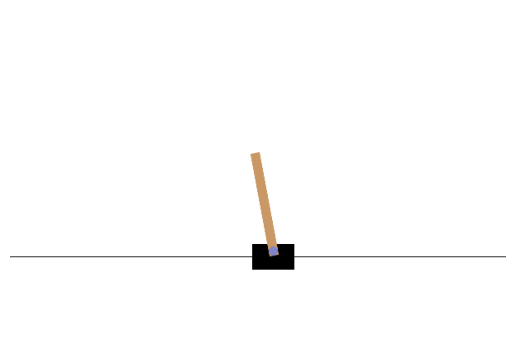

Episode 1: Score 56.0
Episode 2: Score 19.0
Episode 3: Score 16.0
Episode 4: Score 18.0
Episode 5: Score 19.0


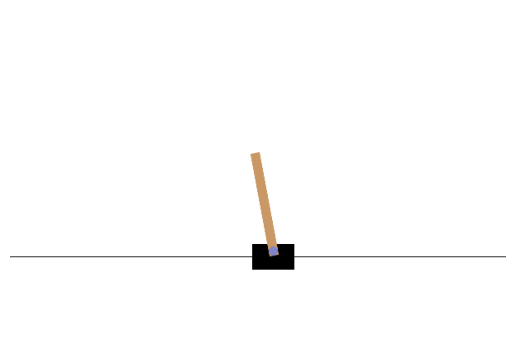

In [13]:
'''
episodes = 5
scores = []  # Store all scores

for episode in range(1, episodes + 1):
    state, _ = env.reset()
    done = False
    score = 0
    step = 0

    while not done:
        #For Displaying
        frame = env.render()
        if step % 15 == 0:
            display.clear_output(wait=True)
            plt.imshow(frame)
            plt.axis("off")
            display.display(plt.gcf())
            # Print scores once per update
            print("\n".join([f"Episode {ep}: Score {sc}" for ep, sc in enumerate(scores, 1)]))

        action = env.action_space.sample()
        n_state, reward, done, _, _ = env.step(action)
        score += reward
        step += 1

    scores.append(score)  # Store the final score for this episode

    # Print updated scores once after the episode ends
    display.clear_output(wait=True)
    plt.imshow(frame)
    plt.axis("off")
    display.display(plt.gcf())
    print("\n".join([f"Episode {ep}: Score {sc}" for ep, sc in enumerate(scores, 1)]))

env.close()
'''

In [18]:
episodes = 5

for episode in range(1, episodes + 1):
    state, _ = env.reset()
    done = False
    score = 0

    while not done:
        frame = env.render()

        # Convert RGB to BGR (OpenCV uses BGR format)
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

        # Display using OpenCV
        cv2.imshow("CartPole", frame)
        cv2.waitKey(20)  # 1ms delay

        action = env.action_space.sample()
        n_state, reward, done, _, _ = env.step(action)
        score += reward

    print(f'Episode: {episode}, Score: {score}')

cv2.destroyAllWindows()


Episode: 1, Score: 15.0
Episode: 2, Score: 23.0
Episode: 3, Score: 10.0
Episode: 4, Score: 43.0
Episode: 5, Score: 43.0


In [40]:
#env.reset()

In [19]:
print(env.action_space)
print(env.action_space.sample())

Discrete(2)
0


In [20]:
print(env.observation_space)
print(env.observation_space.sample())

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)
[-1.3702348e+00  5.3782374e+37 -3.3781979e-02  3.0788986e+38]


In [42]:
#env.reset()

In [43]:
#env.step(1)

In [47]:
#print(env.observation_space.sample())

[-2.2199516e+00  2.2329586e+38  1.9532925e-01 -2.9656104e+38]


## 3. Train an RL Model

In [4]:
#Make directories for this /Training/Logs and /Training/Saved Models
log_path = os.path.join('Training','Logs')

In [12]:
log_path

'Training\\Logs'

In [15]:
env = gym.make("CartPole-v1", render_mode="rgb_array")
env = DummyVecEnv([lambda: env])
#model = PPO("MlpPolicy", env, verbose=1, tensorboard_log = log_path)
model = PPO("MlpPolicy", env, verbose=1, tensorboard_log="log_path", device="cpu")
#MlpPolicy - Multilayer Perceptron Policy
#Stable Baselines 3 has three policy types - MlpPolicy, CnnPolicy, MultiInputPolicy

Using cpu device


In [16]:
PPO??

Init signature:
PPO(
    policy: Union[str, type[stable_baselines3.common.policies.ActorCriticPolicy]],
    env: Union[gymnasium.core.Env, ForwardRef('VecEnv'), str],
    learning_rate: Union[float, Callable[[float], float]] = 0.0003,
    n_steps: int = 2048,
    batch_size: int = 64,
    n_epochs: int = 10,
    gamma: float = 0.99,
    gae_lambda: float = 0.95,
    clip_range: Union[float, Callable[[float], float]] = 0.2,
    clip_range_vf: Union[NoneType, float, Callable[[float], float]] = None,
    normalize_advantage: bool = True,
    ent_coef: float = 0.0,
    vf_coef: float = 0.5,
    max_grad_norm: float = 0.5,
    use_sde: bool = False,
    sde_sample_freq: int = -1,
    rollout_buffer_class: Optional[type[stable_baselines3.common.buffers.RolloutBuffer]] = None,
    rollout_buffer_kwargs: Optional[dict[str, Any]] = None,
    target_kl: Optional[float] = None,
    stats_window_size: int = 100,
    tensorboard_log: Optional[str] = None,
    policy_kwargs: Optional[dict[str, Any]]

In [21]:
model.learn(total_timesteps=20000)
#Timestamps - For a simple environment lower number of timestamps is okay,
#    but must be increased for more sophisticated environment.

Logging to log_path\PPO_2
-----------------------------
| time/              |      |
|    fps             | 1530 |
|    iterations      | 1    |
|    time_elapsed    | 1    |
|    total_timesteps | 2048 |
-----------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 946        |
|    iterations           | 2          |
|    time_elapsed         | 4          |
|    total_timesteps      | 4096       |
| train/                  |            |
|    approx_kl            | 0.01061619 |
|    clip_fraction        | 0.137      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.569     |
|    explained_variance   | 0.918      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.389      |
|    n_updates            | 110        |
|    policy_gradient_loss | -0.0188    |
|    value_loss           | 9.26       |
----------------------------------------
--------------------------

## 4. Save and Reload Model

In [19]:
PPO_Path = os.path.join('Training','Saved Models','PPO_Model_Cartpole')

In [11]:
model.save(PPO_Path)

NameError: name 'model' is not defined

In [ ]:
del model

In [20]:
PPO_Path

'Training\\Saved Models\\PPO_Model_Cartpole'

In [21]:
model = PPO.load(PPO_Path, env=env, device='cpu')

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


## 5. Testing and Evaluation

In [ ]:
# Number of episodes to evaluate
n_eval_episodes = 10

# Run evaluation with OpenCV visualization
for episode in range(n_eval_episodes):
    state, _ = env.reset()
    done = False
    score = 0

    while not done:
        # Render the frame
        frame = env.render()

        # Convert RGB to BGR for OpenCV
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

        # Display the frame using OpenCV
        cv2.imshow("CartPole", frame)
        #cv2.waitKey(30)  # Wait 1ms to allow smooth rendering

        # Select an action using the trained model
        action, _ = model.predict(state)

        # Take a step in the environment
        state, reward, done, info, _ = env.step(action)
        score += reward

    print(f"Episode {episode + 1}: Score = {score}")

# Close OpenCV window
cv2.destroyAllWindows()
env.close()

## 6. Test Model

In [ ]:
episodes = 5

for episode in range(1, episodes + 1):
    obs = env.reset()
    done = False
    score = 0

    while not done:
        
        frame = env.render()
        # Convert RGB to BGR (OpenCV uses BGR format)
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
        # Display using OpenCV
        cv2.imshow("CartPole", frame)
        cv2.waitKey(20)  # 1ms delay

        action, _ = model.predict(obs)
        obs, reward, done, info = env.step(action)
        score += reward

    print(f'Episode: {episode}, Score: {score}')

cv2.destroyAllWindows()


In [ ]:
obs = env.reset()

In [ ]:
model.predict??

In [ ]:
model.predict(obs)

In [ ]:
action,_ = model.predict(obs)

In [ ]:
env.action_space.sample()

In [ ]:
env.step(action)

## 7. Viewing Logs in Tensorboard

In [5]:
log_path = os.path.join('Training','Logs')

In [6]:
training_log_path = os.path.join(log_path, 'PPO_2')

In [7]:
training_log_path

'Training\\Logs\\PPO_2'

In [14]:
#!tensorboard --logdir = training_log_path
#(py310_env) C:\Users\rocha\Reinforcement Learning>python -m tensorboard.main --logdir=log_path\PPO_2

## 8. Adding a callback to the training Stage

In [16]:
#Need to import additional dependencies 
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold

In [ ]:
save_path = os.path.join("Training","Saved Models")

In [17]:
stop_callback = StopTrainingOnRewardThreshold(reward_threshold = 450, verbose = 1)
eval_callback = EvalCallback(env, 
                             callback_on_new_best = stop_callback,
                             eval_freq = 1000,
                             best_model_save_path=save_path,
                             verbose=1)

NameError: name 'env' is not defined

In [ ]:
model = PPO('MlpPolicy', env, verbose=1, tensorboard_log=log_path

model.learn(total_timesteps=20000, callback=eval_callback)

## 9. Changing Policies

In [ ]:
new_arch = [dict(pi=[128,128,128,128],vf=[128,128,128,128])]
#vf - value function

In [26]:
model = PPO('MlpPolicy', env, verbose=1, tensorboard_log=log_path, policy_kwargs={'net_arch':net_arch})

NameError: name 'log_path' is not defined

In [ ]:
model.learn(total_timesteps=20000, callback=eval_callback)

## 10. Using an Alternate Algorithm

In [ ]:
from stable_baselines3 import DQN

In [ ]:
model = DQN('MlpPolicy', env, verbose=1, tensorboard_log=log_path)

In [ ]:
model.learn(total_timesteps=20000)

In [ ]:
# Also remember for loading
DQN.load(...)
#instead of PPO.load(...)